In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
from spiral_solve import spiral_on_sphere
import healpy as hp

import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles


In [2]:
ra, dec = spiral_on_sphere(500)

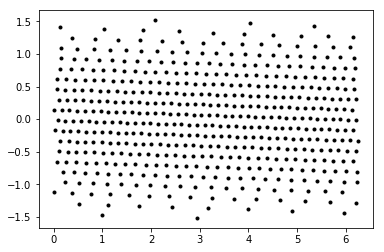

In [3]:
plt.plot(ra, dec, 'k.')

In [28]:
ra, dec = spiral_on_sphere(6700)
names =['ra', 'dec']
types = [float, float]
data = np.zeros(ra.size, dtype = list(zip(names, types)))
data['ra'] = np.degrees(ra)
data['dec'] = np.degrees(dec)


In [29]:
bundleList = []

metric = metrics.CountMetric(col='ra')
slicer = slicers.HealpixSlicer(lonCol='ra', latCol='dec', nside=256, badval=0)
sql = ''

bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

Healpix slicer using NSIDE=256, approximate resolution 13.741946 arcminutes


In [30]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
conn = None
bg = metricBundles.MetricBundleGroup(bd, conn)
bg.setCurrent('')
bg.runCurrent('', simData=data)

Running:  ['opsim_Count_ra_HEAL']


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/metricBundles/metricBundleGroup.py:107: UserWarning: Warning: dbObj should be an instantiated Database (or child) object.
  warnings.warn('Warning: dbObj should be an instantiated Database (or child) object.')


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "" constraint now.
monopole: 1.5624  dipole: lon: -174.734, lat: 49.1383, amp: 0.000440457
Plotting complete.


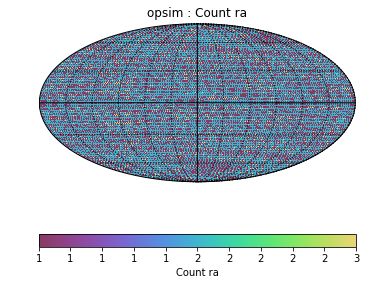

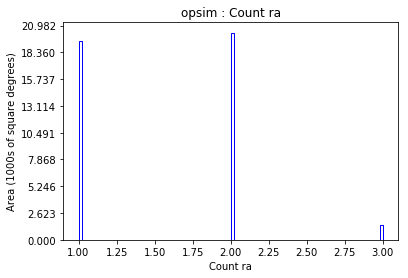

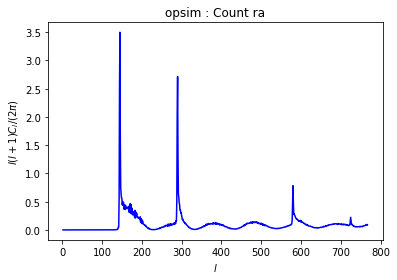

In [31]:
# make sure we plot the unobserved as zeros
bundleList[0].metricValues[np.where(bundleList[0].metricValues.mask == True)] = 0
bundleList[0].metricValues.mask == False
bg.plotAll(closefigs=False)

In [32]:
np.where(bundleList[0].metricValues == 0)

(array([], dtype=int64),)